In [1]:
import sys, os
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'physion', 'src'))
import physion
import physion.utils.plot_tools as pt
import numpy as np

In [2]:
dataM = physion.analysis.read_NWB.Data(os.path.join('C:\\', 'DATA', 'Troubleshooting', 'Movie-Example.nwb'))
dataI = physion.analysis.read_NWB.Data(os.path.join('C:\\', 'DATA', 'Troubleshooting', 'bufferedImages-Example.nwb'))

NWB-file reading time: 102.0ms
NWB-file reading time: 95.0ms


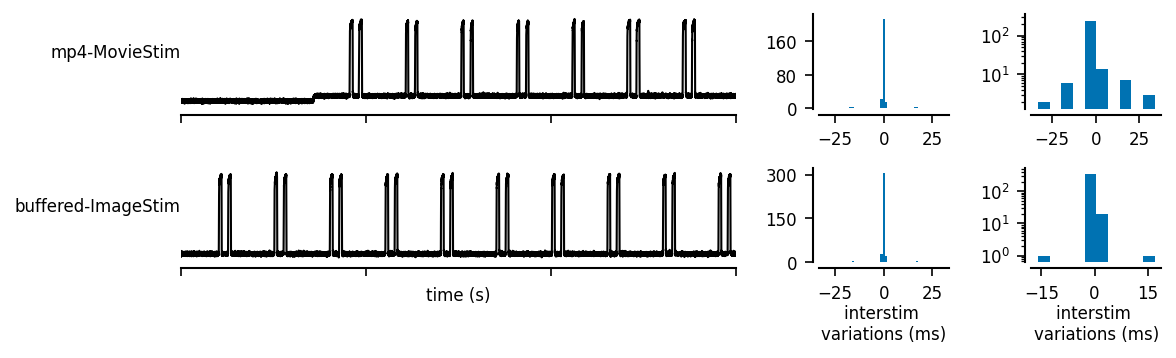

In [3]:
fig, AX = pt.figure(axes_extents=[[[3,1], [1,1], [1,1]],[[3,1], [1,1], [1,1]]])
def plot(data, i, label, tmax=30,
         bins=np.linspace(-30, 30, 50)):
    # plot raw data
    t = np.arange(data.nwbfile.acquisition['Photodiode-Signal'].num_samples)/\
        data.nwbfile.acquisition['Photodiode-Signal'].rate
    cond = t<tmax
    AX[i][0].plot(t[cond],
                  data.nwbfile.acquisition['Photodiode-Signal'].data[:,0][cond], 'k-')
    pt.annotate(AX[i][0], label, (0,0.5), ha='right')
    pt.set_plot(AX[i][0], ['bottom'], xticks_labels=[], xlim=[0, tmax], xlabel='time (s)' if i==1 else '')
    # plot onset variations
    times = np.diff(data.nwbfile.stimulus['time_start_realigned'].data[:,0])
    AX[i][1].hist(1e3*(times-np.mean(times)), bins=bins)
    pt.set_plot(AX[i][1], xlabel='interstim \nvariations (ms)' if i==1 else '')
    AX[i][2].hist(1e3*(times-np.mean(times)))
    pt.set_plot(AX[i][2], yscale='log', xlabel='interstim \nvariations (ms)' if i==1 else '')
    
plot(dataM, 0, 'mp4-MovieStim')
plot(dataI, 1, 'buffered-ImageStim')